<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>Chair of Soil Mechanics and Foundation Engineering<br>Geotechnical Institute<br>Technische Universität Bergakademie Freiberg.</p>
        <p><a href="https://tu-freiberg.de/en/soilmechanics">https://tu-freiberg.de/en/soilmechanics</a></p>
    </div>
</div>

# Spannungsverteilung im Untergrund unter Zusatzbelastungen

## Halbraumspannungen unter schlaffen Rechtecklasten

In [6]:
#HIDDEN
import numpy as np #numerical methods
import matplotlib.pyplot as plt #plotting
import seaborn as sns

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/stresses_steinbrenner_plots.ipynb

Wir berechnen die Vertikalspannungsänderung an einem Punkt $(x,y,z)$ mittels folgender Formel:

$$
    \Delta \sigma_{zz}(x,y,z) = \frac{q_0}{2\pi} \sum \limits_{i=0}^3 (-1)^i \left\{ \left[ \frac{1}{(x+x_i)^2 + z^2} + \frac{1}{(y+y_i)^2 + z^2} \right] \frac{(x+x_i)(y+y_i) z}{R_i} + \arctan \left[ \frac{(x+x_i)(y+y_i)}{z R_i} \right] \right\} \quad \text{mit} \quad R_i = \sqrt{(x+x_i)^2 + (y+y_i)^2 + z^2}
$$

Dabei sind die $x_i$ und $y_i$ die Eckpunkte des Fundaments mit den Abmessungen $(a \times b)$ in $x$ und $y$:

\begin{align}
    x_i &= \{-a/2,\ -a/2,\ a/2,\ a/2\} \quad \text{für } i \in [0,3]
    \\
    y_i &= \{-b/2,\ b/2,\ b/2,\ -b/2\} \quad \text{für } i \in [0,3]
\end{align}

Man beachte, dass in dieser Formel keine Elastizitätskonstanten auftauchen. In den Formeln für die verbliebenen Spannungskoordinaten taucht die Querkontraktionszahl auf.

Die Auswertung dieser Formel ergibt die folgende Isobarendarstellung entlang der zwei vertikalen Symmetrieebenen der Rechtecklast. Die Isobarenbeschriftungen zeigen das Verhältnis $\Delta \sigma_{zz}/q_0$ an.

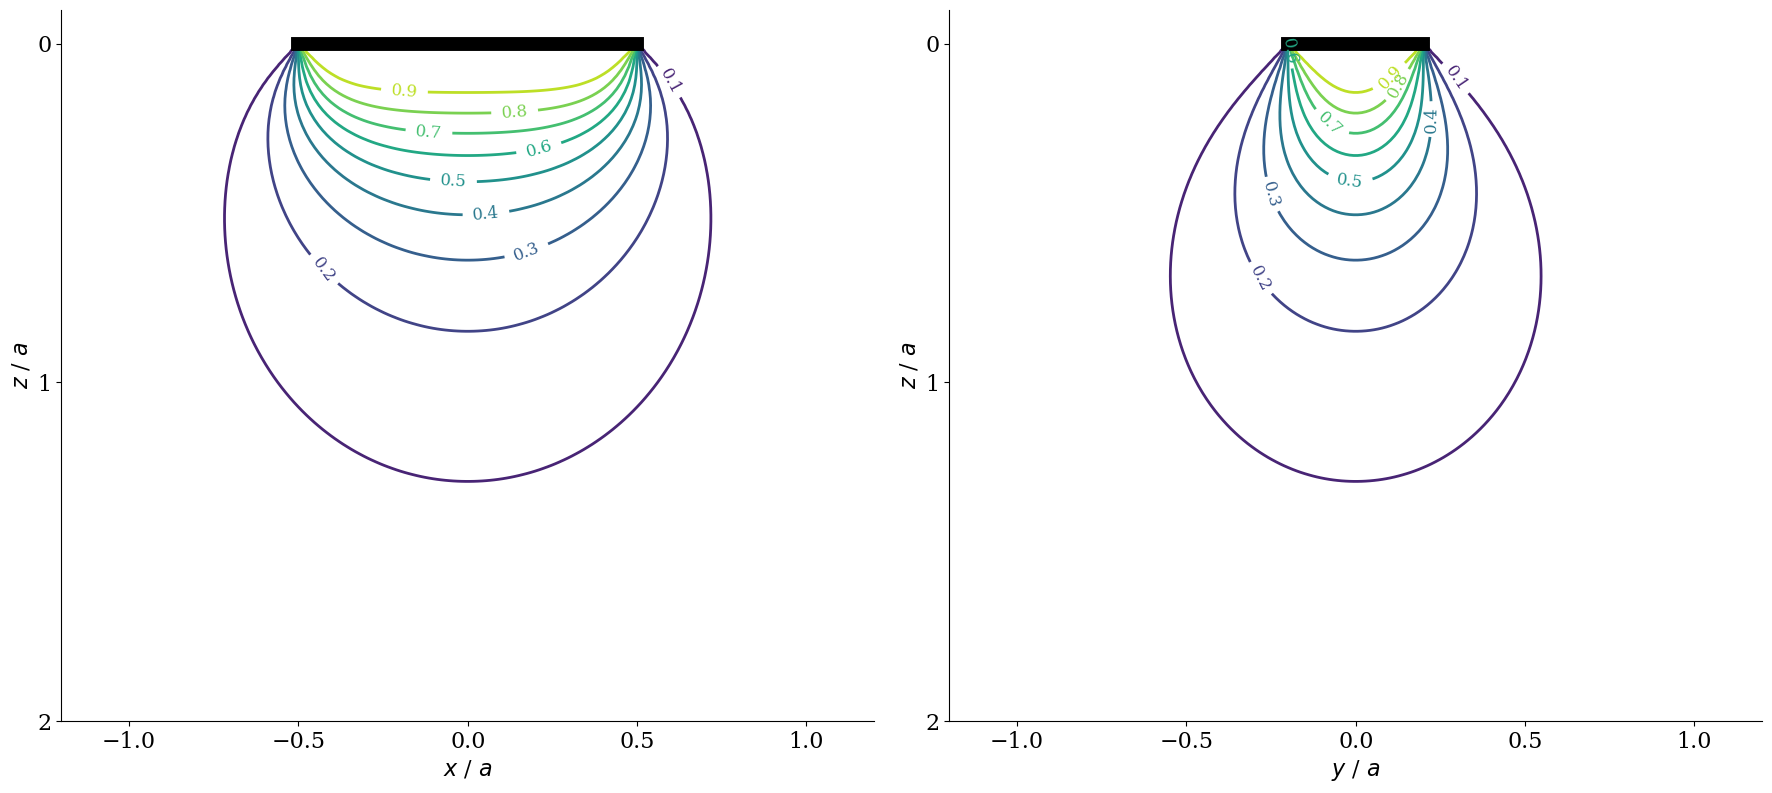

In [8]:
#HIDDEN
plot_isobars_zz()

### Aufgabe (angelehnt an Möller (2016):

In einem Sandboden mit der charakteristischen Wichte $\gamma = 18.5\,$kN/m³ soll $4\,$m unter GOK ein Rohr verlegt werden (Höhe gemessen an Rohrscheitelpunkt). Auf einer Fläche von $2\times 3\,$m soll eine schlaffe vertikale Flächenlast $q_0$ aufgebracht werden. In seiner dichtesten Annäherung an die Last passiert das Rohr einen Eckpunkt der Last in einer Entfernung von jeweils einem Meter in $x$ bzw. $y$ Richtung (Skizze!). Wie hoch darf die Flächenlast maximal werden, damit eine Belastung des Rohrscheitelpunktes von $\sigma_{zz,\text{max}} = 200\,$kPa nicht überschritten wird?

### Lösungsansatz:

Die vertikal wirkende Spannung setzt sich aus den Auswirkungen der Zusatzlast und dem Grundspannungszustand zusammen. Letzterer berechnet sich zu:

$$
    \sigma_{zz,0} = \gamma z
$$

Damit dürfen die Zusatzspannungen einen Wert von

$$
    \Delta \sigma_{zz,\text{max}} = \sigma_{zz,\text{max}} - \sigma_{zz,0}
$$

nicht überschreiten. Dabei ist $\Delta \sigma_{zz}$ die in einer Tiefe von $4\,$m wirkende Spannungsänderung. Diese ergibt sich aus der obigen Formel, die nach $q_0$ umgestellt werden kann. Definiert man sich einen Spannungsbeiwert $i$ derart, dass $\Delta \sigma_{zz}(q_0 = 1\,\text{kPa}) = i = \Delta \sigma_{zz} / q_0$, so können wir die maximal zulässige Flächenlast aufgrund der Linearität der Theorie auch wie folgt berechnen:

$$
    q_{0,\text{max}} = \frac{\Delta \sigma_{zz,\text{max}}}{i} =  \frac{\Delta \sigma_{zz,\text{max}}}{\Delta \sigma_{zz}(q_0 = 1\,\text{kPa})}
$$

In [10]:
gamma = 18.5
z = 4.
Delta_sigma_max = 200 - gamma*z

In [11]:
#HIDDEN
print("Die zulässige Spannungsänderung in 4 m Tiefe an der Stelle des Rohres beträgt %.2f kN/m²" %Delta_sigma_max)

Die zulässige Spannungsänderung in 4 m Tiefe an der Stelle des Rohres beträgt 126.00 kN/m²


In [12]:
q0 = 1 #kPa
x = 2.5 #m
y = 2.0 #m
a = 3.0 #m
b = 2.0 #m

In [13]:
i = sigma_z_rectangle(x,y,z,q0,a,b) #Dieser Funktionsaufruf führt die obige Formel aus

In [14]:
#HIDDEN
print("Der Spannungsbeiwert am Rohrscheitelpunkt beträgt %.5f" %i)

Der Spannungsbeiwert am Rohrscheitelpunkt beträgt 0.05414


In [15]:
q0_max = Delta_sigma_max/i

In [16]:
#HIDDEN
print("Die maximal zulässige Flächenlast beträgt somit %.2f kN/m²" %q0_max)

Die maximal zulässige Flächenlast beträgt somit 2327.09 kN/m²


Wir überprüfen das Ergebnis, indem wir die identifizierte maximale Belastung wieder in die obige Formel einsetzen. Dabei muss gelten:

$$
    \Delta \sigma_{zz,\text{max}} = \Delta \sigma_{zz}(q_{0,\text{max}})
$$

In [18]:
Probe = sigma_z_rectangle(x,y,z,q0_max,a,b)

In [19]:
#HIDDEN
print("Der aus der maximal zulässigen Flächenlast resultierende Spannungszuwachs beträgt am Rohrscheitelpunkt %.2f kN/m²" %Probe)

Der aus der maximal zulässigen Flächenlast resultierende Spannungszuwachs beträgt am Rohrscheitelpunkt 126.00 kN/m²


## Beiwerte nach Steinbrenner -- Eckpunkte

Setzt man in die obige Formel die Eckpunktkoordinaten ein, so kommt man zu einer Formel, die deutlich häufiger Anwendung findet. Dies ist die Formel für den Vertikalspannungszuwachs unter dem Eckpunkt $E$ einer schlaffen Rechtecklast nach *Steinbrenner*. Sie lautet:

$$
    \Delta \sigma_{zz}|_E = \frac{q_0}{2\pi} \left\{ \frac{bz}{b^2 + z^2} \cdot \frac{a(R^2 + z^2)}{(a^2 + z^2)R} + \arctan \left[ \frac{b}{z}\cdot \frac{a(a^2 + b^2) - 2 a z (R-z)}{(a^2+b^2)(R-z) - z(R-z)^2} \right] \right\} \quad \text{mit} \quad R = \sqrt{a^2 + b^2 + z^2}
$$

Aus dieser Formel werden die Beiwerte $i$ abgeleitet, die in den *Steinbrennertafeln* tabelliert oder in den typischen Nomogrammen zu graphischen Auswertung vorliegen. Praktisch bietet es sich jedoch an, die Werte per Tabellenkalkulation oder anderweitig programmiert (wie hier) vorliegen zu haben. In das Folgende Diagramm können das Kantenlängenverhältnis der Rechtecklast $a/b$ ($a\geq b$) sowie die bezogene Tiefe $z/b$ eingegeben und der Beiwert $i$ abgelesen werden.

In [21]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_i_rechteck()

interactive(children=(BoundedFloatText(value=1.0, description='$z$ / $b$', max=20.0, min=0.01), BoundedFloatTe…

### Aufgabe

Vollziehen Sie nun die Lösung der obigen Aufgabe unter Verwendung des Superpositionsprinzips nach. Verwenden Sie dazu den Ansatz nach Steinbrenner, indem Sie mit zusätzlichen fiktiven Rechtecklasten arbeiten und die Beiwerte $i$ unter deren jeweiligen Eckpunkten berechnen. Treten zum oben erzielten Ergebnis Abweichungen auf? Warum?

## Vom schlaffen Lastbündel zur starren Sohlplatte

Wird ein starres Streifenfundament durch die vertikale Linienlast $f_z$ belastet, so stellt sich in der Sohlfuge folgende Sohldruckverteilung ein:

$$
    \sigma_0(x) = \sigma_{zz}(x,z=0) = \frac{2f_z}{b \pi} \frac{1+8 \frac{ex}{b^2}}{\sqrt{1 - 4 \left(\frac{x}{b}\right)^2}} \quad \text{für} \quad  |e| \leq \frac{b}{4}
$$

Normiert man die Gleichung auf die einem gleichförmig belasteten schlaffen Lastbündel äquivalente Spannungsverteilung $q = f_z/b$, so ergibt sich die folgende Skalierungsfunktion:

$$
    \frac{\sigma_0(x)}{q} = \frac{2}{\pi} \frac{1+8 \frac{ex}{b^2}}{\sqrt{1 - 4 \left(\frac{x}{b}\right)^2}} \quad \text{für} \quad  |e| \leq \frac{b}{4}
$$

*Aufgabe:* Weisen Sie rechnerisch die Singularität der Spannungsverteilung an den Eckpunkten nach. Tritt diese in der Natur auf? Begründen Sie Ihre Aussage.

*Aufgabe:* Überlegen Sie anhand der interaktiven Darstellung unten, warum die obigen Gültigkeitsgrenzen der Lösung hinsichtlich der Lastexzentrizität bestehen. Weisen Sie Ihre Überlegungen rechnerisch nach.

In [24]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_sohlfuge()

interactive(children=(BoundedFloatText(value=0.0, description='$e$ / $b$', max=0.25, min=-0.25, step=0.05), Ou…

Wir können die Formel nun auch verwenden, um die Schnittpunkte der Spannungsverteilung zu bestimmen. An diesen sog. kennzeichnenden Punkten sind die Sohlspannungen des schlaffen Lastbündels und der biegestarren Streifenlast gleich. Aus $\sigma_0/q = 1$ ergibt sich die Lage dieser kennzeichnenden Punkte zu:

$$
    x_\text{K} = \pm \frac{b}{2} \sqrt{1 - \frac{4}{\pi^2}} \approx \pm 0.386 b
$$

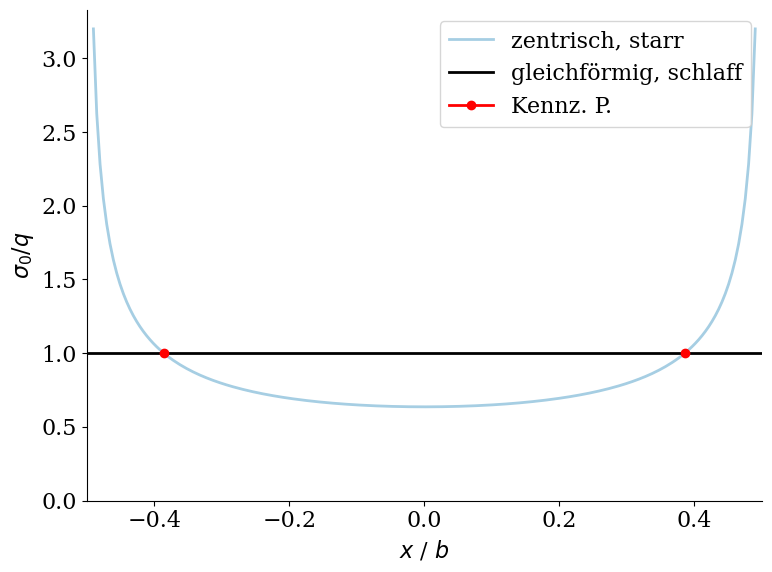

In [26]:
#HIDDEN
plot_char_pt_strip()

Ähnliche Überlegungen können für das Kreisfundament mit dem Radius $R$ angestellt werden. Dort gilt die Beziehung

$$
    \frac{\sigma_0(r)}{q} = \frac{1}{2 \sqrt{1 - \left(\frac{r}{R} \right)^2}}
$$

Aus dieser Beziehung kann der kennzeichnende Radius $r_\text{K}$ abgeleitet werden:

$$
    r_\text{K} = \frac{\sqrt{3}}{2} R \approx 0.866 R
$$

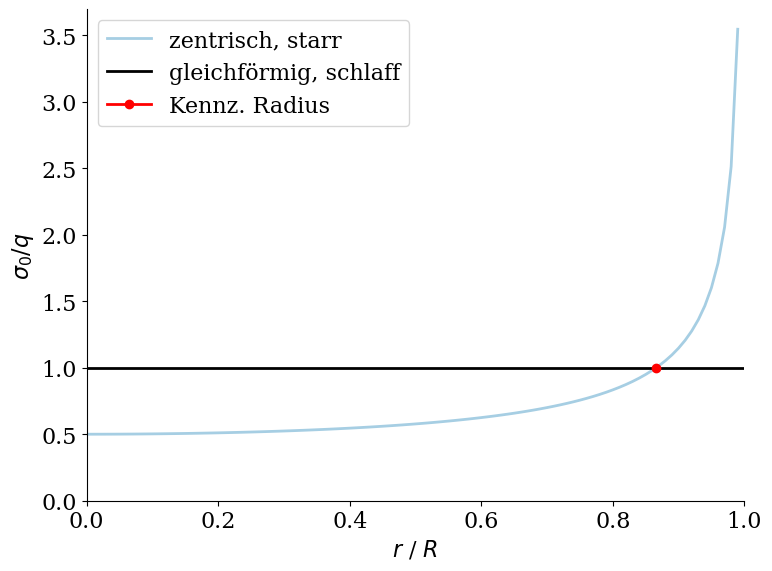

In [28]:
#HIDDEN
plot_char_pt_circle()

Für die auf eine rechteckige Fläche aufgebrachte Last schließlich finden wir folgende Sohldruckverteilung im Falle der starren Platte im Vergleich zum schlaffen Lastbündel der Intensität $q$:

$$
    \frac{\sigma_0(x,y)}{q} = \frac{4}{\pi^2 \sqrt{\left[1 - 4\left( \frac{x}{a} \right)^2\right]\left[1 - 4\left( \frac{y}{b} \right)^2\right]}}
$$

Der kennzeichnende Punkt wird auf der Diagonalen der Rechteckfläche liegen. Diese Diagonale ist im auf ein Einheitsquadrat skalierten und um den Koordinatenursprung zentrierten Rechteck gekennzeichnet durch die Radialkoordinate:

$$
    \bar{r} = \frac{x}{a} = \frac{y}{b}
$$

Damit ergibt sich die Lage der vier kennzeichnenden Punkte über die Beziehung

$$
    \bar{r}_\text{K} = \pm \frac{1}{2} \sqrt{1 - \frac{4}{\pi^2}} \approx 0.386
$$


Somit gilt

\begin{align}
    x_\text{K} &\approx \pm 0.386 a
    \\
    y_\text{K} &\approx \pm 0.386 b
\end{align}

Im folgenden Bild ist die Sohldruckverteilung unter dem starren Rechteckfundament dargestellt. Die graue Ebene stellt hingegen die gleichförmig verteilte Last $q$ dar. Die roten Punkte kennzeichnen die charakteristischen Punkte.

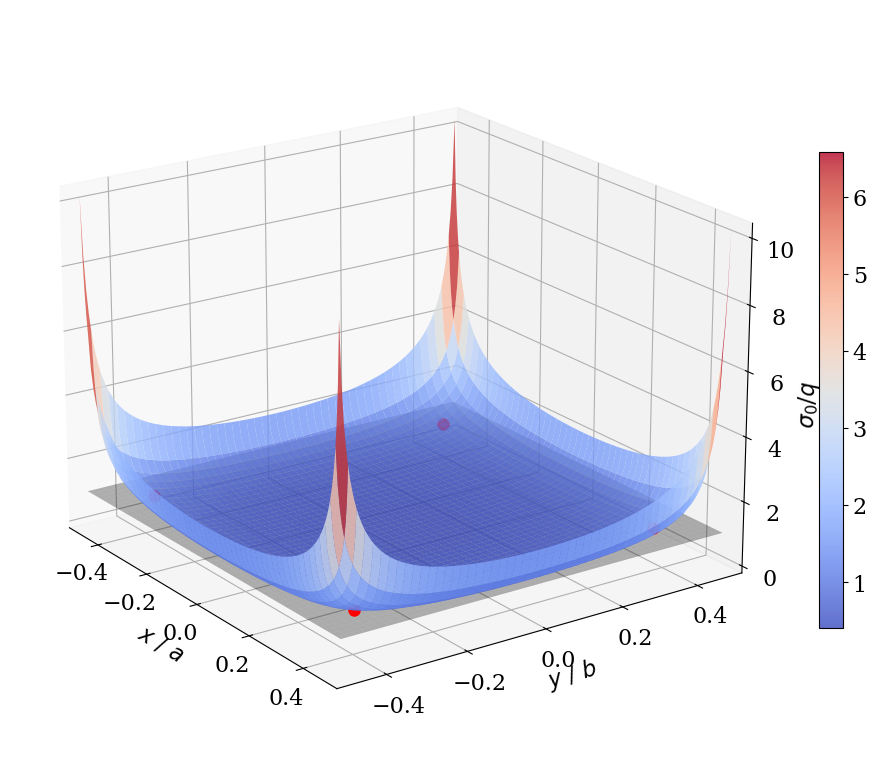

In [30]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
plot_char_pt_rect()

## Beiwerte nach Steinbrenner -- Kennzeichnende Punkte

In den hier verwendeten kennzeichnenden Punkten sind die Setzungsbeträge unter der schlaffen Rechtecklast gleich denen unter einem ideal starren Fundament (dazu später mehr). Die kennzeichnenden Punkte liegen für die Rechtecklast bei

\begin{align}
    x_\text{K} &= \pm 0.37 a
    \\
    y_\text{K} &= \pm 0.37 b
\end{align}

Mittels der oben betrachteten Formeln (analog zu den beiden Lösungswegen) lassen sich auch dafür Beiwerte $i_\text{K}$ ableiten und Steinbrenner'sche Nomogramme zeichnen und in der Setzungsberechnung anwenden.

In [32]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_i_k_rechteck()

interactive(children=(BoundedFloatText(value=1.0, description='$z$ / $b$', max=20.0, min=0.01), BoundedFloatTe…